In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("techsash/waste-classification-data")

print("Path to dataset files:", path)

100%|██████████| 427M/427M [00:07<00:00, 59.6MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/techsash/waste-classification-data/versions/1


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")


In [4]:
train_path="/root/.cache/kagglehub/datasets/techsash/waste-classification-data/versions/1/DATASET/TRAIN"
test_path="/root/.cache/kagglehub/datasets/techsash/waste-classification-data/versions/1/DATASET/TEST"

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Activation,Dropout,Flatten,Dense,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.utils import plot_model
from glob import glob

In [6]:
from cv2 import cvtColor
x=[]
y=[]
for category in glob(train_path+'/*'):
    for file in tqdm(glob(category+'/*')):
        img_array=cv2.imread(file)
        img_array=cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB)
        x.append(img_array)
        y.append(category.split('/')[-1])
data=pd.DataFrame({'image':x, 'label':y})

100%|██████████| 12565/12565 [00:10<00:00, 1163.41it/s]


In [7]:
data.shape

(22564, 2)

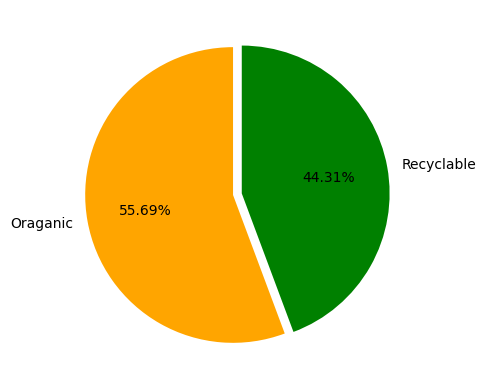

In [8]:
colors=['orange', 'green']
plt.pie(data.label.value_counts(),labels=['Oraganic','Recyclable'],autopct='%0.2f%%',colors=colors,startangle=90,explode=[0.03,0.03])
plt.show()

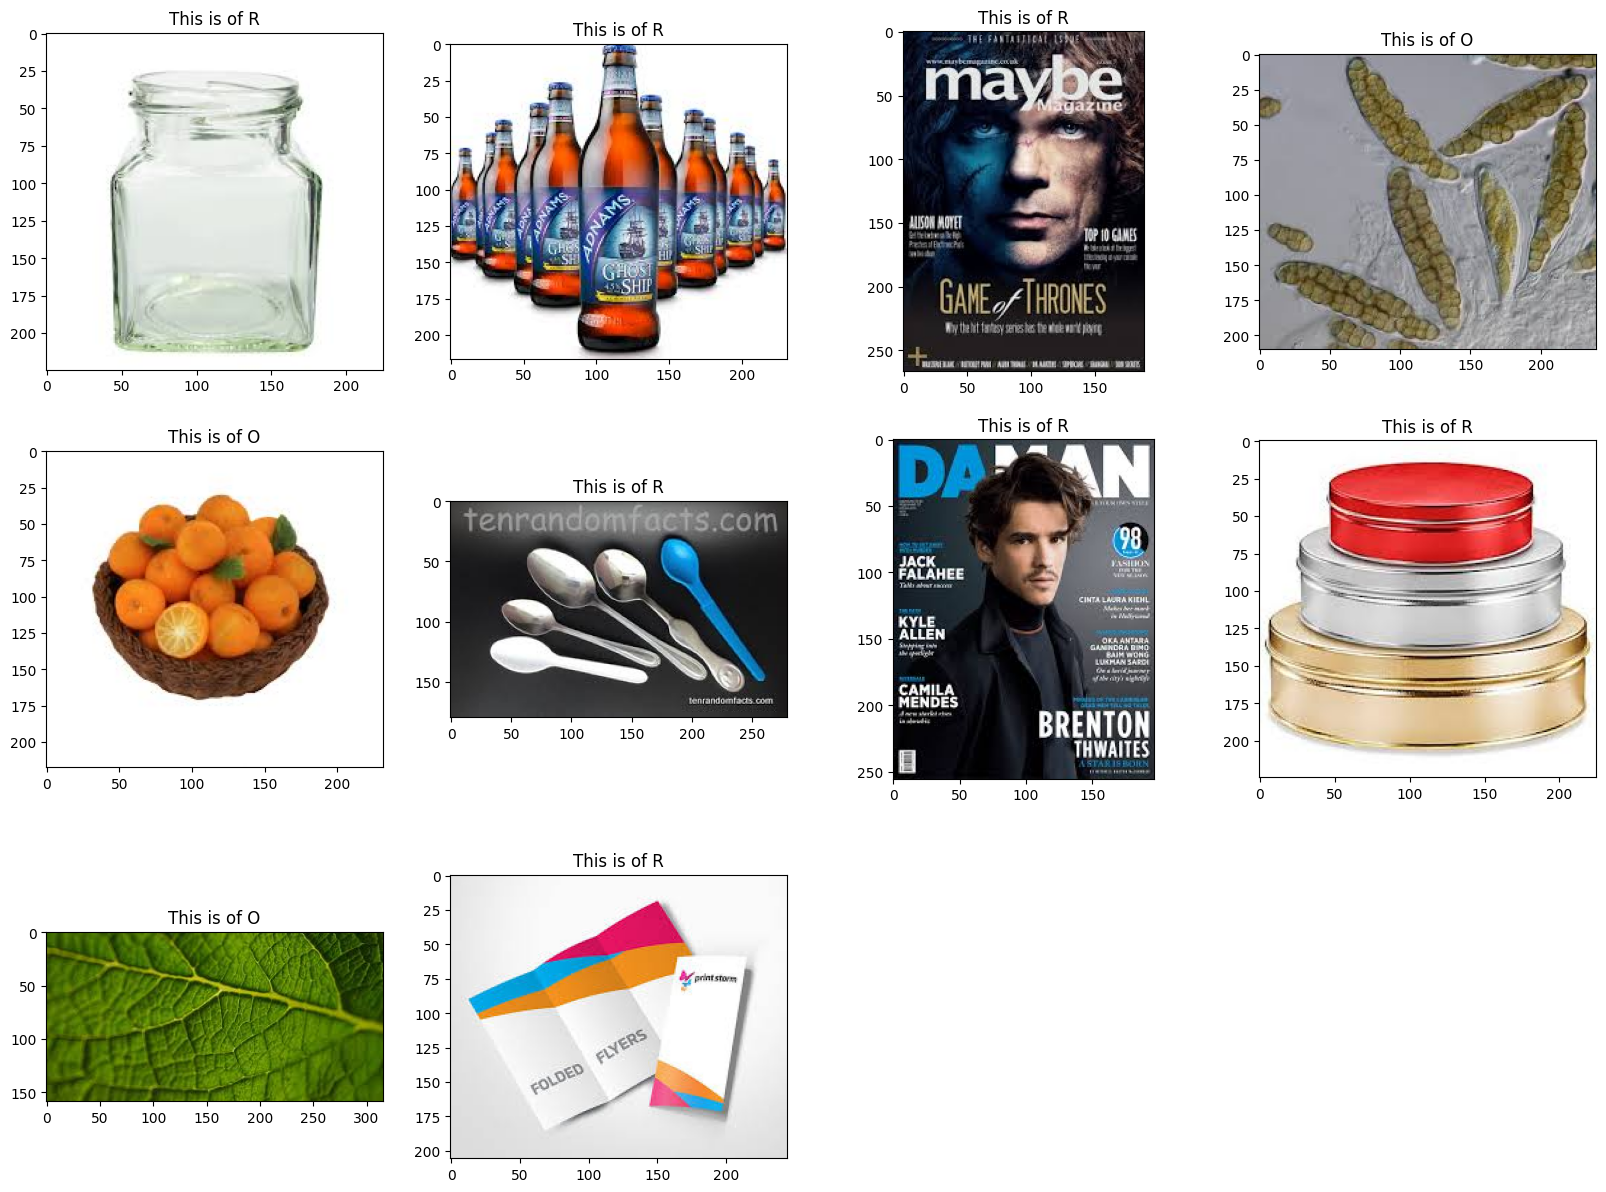

In [9]:
plt.figure(figsize=(20,15))
for i in range(10):
    plt.subplot(3,4,(i%12)+1)
    index=np.random.randint(15000)
    plt.title('This is of {0}'.format(data.label[index]))
    plt.imshow(data.image[index])

In [10]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(224, 224, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(2))
model.add(Activation('sigmoid'))

model.compile(loss = "binary_crossentropy",
              optimizer = "adam",
              metrics = ["accuracy"])
batch_size = 256

In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 222, 222, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 109, 109, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 52, 52, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 24, 24, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 24, 24, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 18432)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       4,718,848 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_5 (Activation)            │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │             130 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_6 (Activation)            │ (None, 2)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴──────────────

 Total params: 4,976,258 (18.98 MB)

 Trainable params: 4,976,258 (18.98 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
train_datagen = ImageDataGenerator(rescale = 1./255)

In [13]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [14]:
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size = (224, 224),
    batch_size = batch_size,
    color_mode = "rgb",
    class_mode = "categorical")

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size = (224, 224),
    batch_size = batch_size,
    color_mode = "rgb",
    class_mode = "categorical")

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [23]:
hist = model.fit(
    train_generator,
    epochs=8,
    validation_data=test_generator
)

Epoch 1/8
89/89 ━━━━━━━━━━━━━━━━━━━━ 51s 566ms/step - accuracy: 0.9742 - loss: 0.0720 - val_accuracy: 0.8945 - val_loss: 0.5424
Epoch 2/8
89/89 ━━━━━━━━━━━━━━━━━━━━ 50s 569ms/step - accuracy: 0.9799 - loss: 0.0606 - val_accuracy: 0.9041 - val_loss: 0.4488
Epoch 3/8
89/89 ━━━━━━━━━━━━━━━━━━━━ 51s 568ms/step - accuracy: 0.9779 - loss: 0.0655 - val_accuracy: 0.9057 - val_loss: 0.4724
Epoch 4/8
89/89 ━━━━━━━━━━━━━━━━━━━━ 81s 561ms/step - accuracy: 0.9818 - loss: 0.0510 - val_accuracy: 0.9009 - val_loss: 0.5552
Epoch 5/8
89/89 ━━━━━━━━━━━━━━━━━━━━ 51s 567ms/step - accuracy: 0.9884 - loss: 0.0340 - val_accuracy: 0.8997 - val_loss: 0.6521
Epoch 6/8
89/89 ━━━━━━━━━━━━━━━━━━━━ 50s 562ms/step - accuracy: 0.9786 - loss: 0.0626 - val_accuracy: 0.9013 - val_loss: 0.5259
Epoch 7/8
89/89 ━━━━━━━━━━━━━━━━━━━━ 50s 553ms/step - accuracy: 0.9867 - loss: 0.0389 - val_accuracy: 0.8949 - val_loss: 0.6585
Epoch 8/8
89/89 ━━━━━━━━━━━━━━━━━━━━ 51s 563ms/step - accuracy: 0.9875 - loss: 0.0388 - val_accuracy: 0.

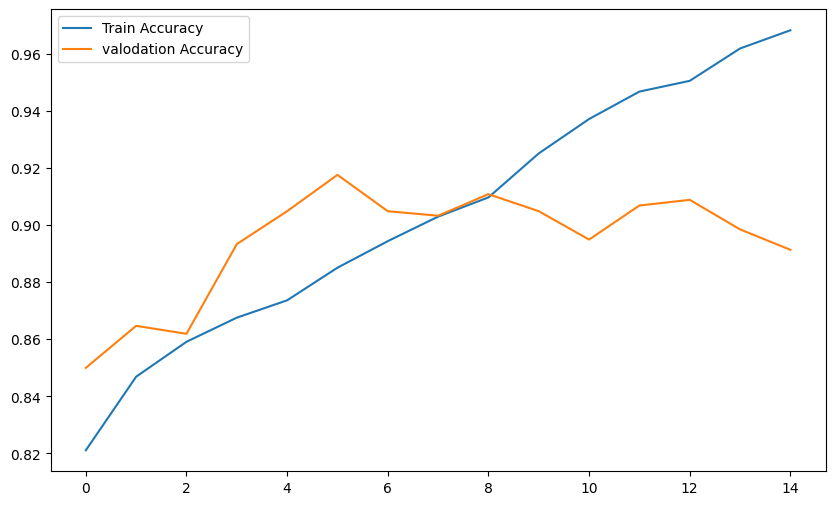

In [18]:
plt.figure(figsize=(10,6))
plt.plot(hist.history['accuracy'],label='Train Accuracy')
plt.plot(hist.history['val_accuracy'],label='valodation Accuracy')
plt.legend()
plt.show()

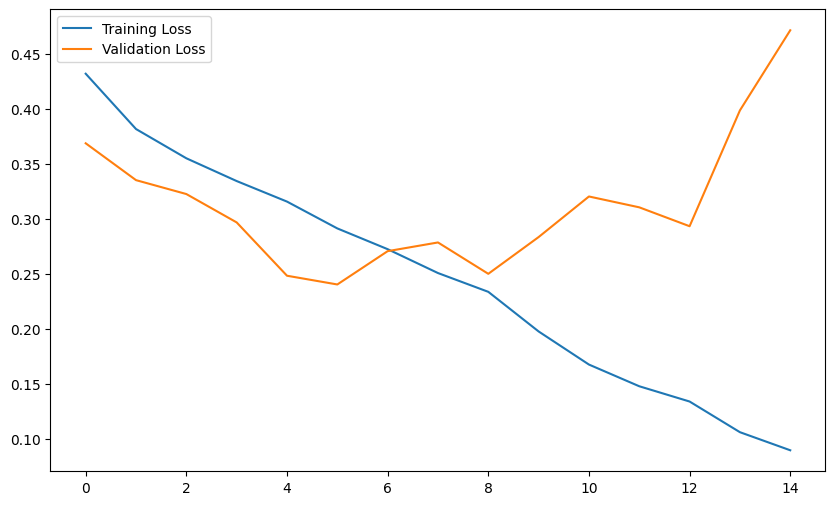

In [19]:
plt.figure(figsize=(10,6))
plt.plot(hist.history['loss'], label='Training Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

In [20]:
def predict_fun(img):
  plt.figure(figsize=(6, 4))
  plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  plt.tight_layout()
  img = cv2.resize(img, (224, 224))
  img = np.reshape(img, [-1, 224, 224, 3])
  result = np.argmax(model.predict(img))
  if result == 0:
    print('The image shown is Recyclable Waste')
  elif result == 1:
    print('The image shown is Organic Waste')

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 853ms/step
The image shown is Organic Waste


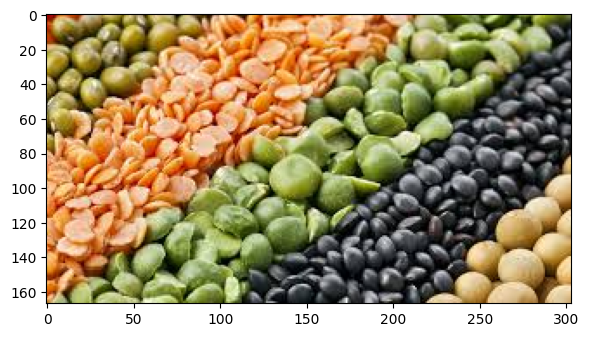

In [22]:
test_img = cv2.imread('/content/O_13313.jpg')
predict_fun(test_img)